In [16]:
import pandas as pd # already comes with matplotlib and NumPy
import glob
import os
import plotnine

# import matplotlib


In [17]:
# getting working directory
cwd = os.getcwd() 
print(cwd) # was originally set to src, had to change it to project dir

# set working directory
# os.chdir('../') # check and see before running this again

/home/meelyn/Documents/cloud_development/sw-python-ecology-lesson


In [18]:
# read csv
pd.read_csv('data/surveys.csv')

surveys_df = pd.read_csv('data/surveys.csv')
surveys_df # will print output if you type df name or print(surveys_df)


,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


In [19]:
# Attributes and Methods

# print(surveys_df) # prints out a bit of the data frame
# HINT! if you want everything to print out on Jupyter Notebook cell, you will need to use print()

print(surveys_df.head()) # only prints first few rows

print(type(surveys_df)) # type is pandas.core.frame.DataFrame

print(surveys_df.dtypes) # prints out variable types

# Useful ways to view DataFrame Objects in Python
## there are many ways to summarize and access the data stored in DataFrames, using attributes and methods provided by the DataFrame object.

## attributes - features of an object (columns, rows, variable type)
### shape will output the size (number of rows and columns) of an object
### access an attribute name by 'df_object.attribute' ex. surveys_df.columns, returns an array/list
print(surveys_df.columns)

### methods are like functions, but only work on particular kinds of objects
### head() is a function that returns the first few rows of dataframe
print(surveys_df.head())

# Challenge DataFrames
print(surveys_df.columns)
print(surveys_df.shape) # returns variable names, number of rows and number of columns
# shape is a tuple - consists of a number of values separated by commas

# print(surveys_df.head(15)) # prints first 15 rows, remember that python starts at 0

# print(surveys_df.tail())

print(pd.unique(surveys_df['species_id'])) # gets unique number of species

site_names = pd.unique(surveys_df['plot_id'])
print('site names', site_names)

# difference between len(site_names) and surveys_df['plot_id'].nunique() - no difference, both print out the same value (24)
print('site name length', len(site_names))
print('unique plot id from surveys_df', surveys_df['plot_id'].nunique())


print(surveys_df['weight'].describe()) # provides basic summary statistics

#can extract specific metrics from describe method
print('weight min', surveys_df['weight'].min())
print('weight max', surveys_df['weight'].max())
print('weight mean', surveys_df['weight'].mean())
print('weight std', surveys_df['weight'].std())
print('weight count', surveys_df['weight'].count())




   record_id  month  day  year  plot_id species_id sex  hindfoot_length  \
0          1      7   16  1977        2         NL   M             32.0   
1          2      7   16  1977        3         NL   M             33.0   
2          3      7   16  1977        2         DM   F             37.0   
3          4      7   16  1977        7         DM   M             36.0   
4          5      7   16  1977        3         DM   M             35.0   

   weight  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  
<class 'pandas.core.frame.DataFrame'>
record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object
Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')
   record_id  month  day  year  plot_id species

In [20]:
# summarize by one or more variables, use panadas .groupby method
grouped_data = surveys_df.groupby('sex')
print(grouped_data.describe()) # need to use describe method to display summary stats from the groupby dataframe by sex
print(grouped_data.mean(numeric_only=True)) # only provides the mean of the numeric variables.

    record_id                                                               \
        count          mean           std  min      25%      50%       75%   
sex                                                                          
F     15690.0  18036.412046  10423.089000  3.0  8917.50  18075.5  27250.00   
M     17348.0  17754.835601  10132.203323  1.0  8969.75  17727.5  26454.25   

                month            ... hindfoot_length         weight  \
         max    count      mean  ...             75%   max    count   
sex                              ...                                  
F    35547.0  15690.0  6.583047  ...            36.0  64.0  15303.0   
M    35548.0  17348.0  6.392668  ...            36.0  58.0  16879.0   

                                                         
          mean        std  min   25%   50%   75%    max  
sex                                                      
F    42.170555  36.847958  4.0  20.0  34.0  46.0  274.0  
M    42.995379  36.18

In [21]:
# Challenge - Summary Data
# 1. How many recorded individuals are female F and how many are male M - 15690 females, 17348 males

print(surveys_df.groupby('sex').count())

# 2. What happens when you group by two columns using the following syntax and then calculate mean values?

grouped_data2 = surveys_df.groupby(['plot_id', 'sex']).describe()
print('described grouped data 2', grouped_data2)

print('numeric only grouped data 2', grouped_data2.mean(numeric_only = True)) # need the numeric_only = True when calculating the mean because...

# better to use .agg after .groupby() to obtain the last survey year, median foot-length and mean weight for each plot/sex combo
print('aggregate grouped data 2', surveys_df.groupby(['plot_id', 'sex']).agg({"year": 'max',
                                            "hindfoot_length": 'max',
                                            "weight": 'mean'}))

# 3. summarize weight values for each site in your data. Use by_site['weight'].describe()
weight_sum = surveys_df.groupby(['plot_id'])['weight'].describe() # grouping by plot id, describe the weight stats (in brackets)
print('weight sum', weight_sum)

     record_id  month    day   year  plot_id  species_id  hindfoot_length  \
sex                                                                         
F        15690  15690  15690  15690    15690       15690            14894   
M        17348  17348  17348  17348    17348       17348            16476   

     weight  
sex          
F     15303  
M     16879  
described grouped data 2             record_id                                                         \
                count          mean           std     min       25%      50%   
plot_id sex                                                                    
1       F       848.0  18390.384434  10469.790852     9.0   8783.50  19182.5   
        M      1095.0  17197.740639   9911.570595     6.0   8638.00  17043.0   
2       F       970.0  17714.753608  10300.015076     3.0   9580.25  18104.5   
        M      1144.0  18085.458042  10555.331260     1.0   8653.00  19024.5   
3       F       893.0  19888.783875   9352.010884 

In [22]:
# creating summary counts in pandas
species_count = surveys_df.groupby(['species_id'])['record_id'].count() # counts the number of unique species for each record id
print(species_count) # prints data frame of species and id
print('species id count', species_count.describe()) # again, describe provides summary statistics

species_id
AB      303
AH      437
AS        2
BA       46
CB       50
CM       13
CQ       16
CS        1
CT        1
CU        1
CV        1
DM    10596
DO     3027
DS     2504
DX       40
NL     1252
OL     1006
OT     2249
OX       12
PB     2891
PC       39
PE     1299
PF     1597
PG        8
PH       32
PI        9
PL       36
PM      899
PP     3123
PU        5
PX        6
RF       75
RM     2609
RO        8
RX        2
SA       75
SC        1
SF       43
SH      147
SO       43
SS      248
ST        1
SU        5
UL        4
UP        8
UR       10
US        4
ZL        2
Name: record_id, dtype: int64
species id count count       48.000000
mean       724.708333
std       1728.925837
min          1.000000
25%          5.000000
50%         37.500000
75%        552.500000
max      10596.000000
Name: record_id, dtype: float64


In [26]:
# Challenge - Make a List
## find another way to create a list of species and associated count of the records in the data.
species_counts = surveys_df.groupby('species_id').count()['record_id']
print(records)

species_id
AB      303
AH      437
AS        2
BA       46
CB       50
CM       13
CQ       16
CS        1
CT        1
CU        1
CV        1
DM    10596
DO     3027
DS     2504
DX       40
NL     1252
OL     1006
OT     2249
OX       12
PB     2891
PC       39
PE     1299
PF     1597
PG        8
PH       32
PI        9
PL       36
PM      899
PP     3123
PU        5
PX        6
RF       75
RM     2609
RO        8
RX        2
SA       75
SC        1
SF       43
SH      147
SO       43
SS      248
ST        1
SU        5
UL        4
UP        8
UR       10
US        4
ZL        2
Name: record_id, dtype: int64


In [24]:
# Basic math functions
## can add or divide on an entire column of data
## will multiply all weight values by 2
surveys_df['weight']*2

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
35544      NaN
35545      NaN
35546     28.0
35547    102.0
35548      NaN
Name: weight, Length: 35549, dtype: float64

<Axes: xlabel='species_id'>

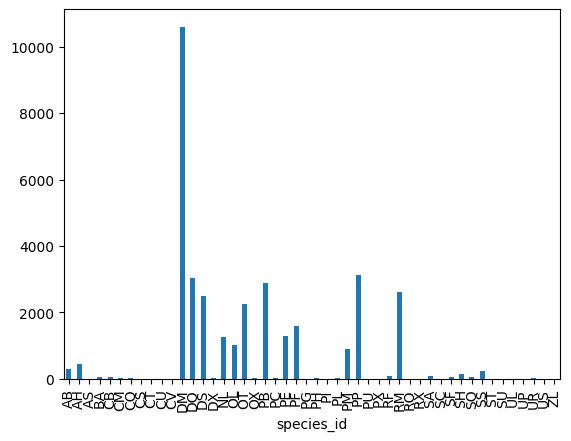

In [27]:
# Quick and Easy Plotting Data Using Pandas
## we can plot our summary stats using pandas too

## Make sure figures appear inline in Ipython Notebook
%matplotlib inline

# Create a quick bar chart
species_counts.plot(kind='bar')

<class 'pandas.core.series.Series'>


<Axes: xlabel='plot_id'>

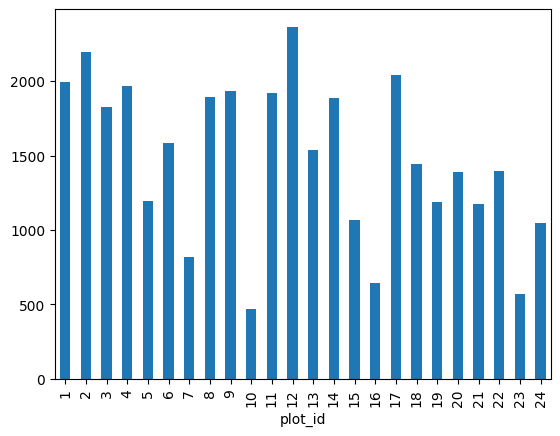

In [28]:
# we can also look at how many animals were captured in each site
total_count = surveys_df.groupby('plot_id')['record_id'].nunique()
# printing a bar graph
print(type(total_count))
total_count.plot(kind='bar')

plot_id
1     51.822911
2     52.251688
3     32.654386
4     47.928189
5     40.947802
6     36.738893
7     20.663009
8     47.758001
9     51.432358
10    18.541219
11    43.451757
12    49.496169
13    40.445660
14    46.277199
15    27.042578
16    24.585417
17    47.889593
18    40.005922
19    21.105166
20    48.665303
21    24.627794
22    54.146379
23    19.634146
24    43.679167
Name: weight, dtype: float64


<Axes: xlabel='sex'>

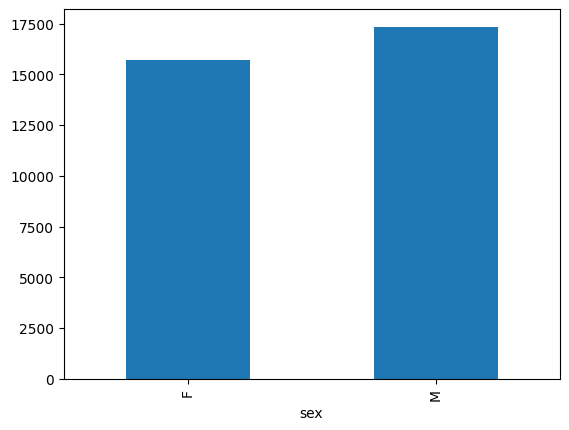

In [38]:
# Challenge - Plots
## Create a plot of average weight across all species per site

average_weight = surveys_df.groupby('plot_id')['weight'].mean()
print(average_weight)
average_weight.plot(kind='bar')

## Create a plot of total males versus total females for the entire dataset

sex_comp = surveys_df.groupby('sex')['record_id'].count()
sex_comp.plot(kind='bar')


stacked plot plot_id  sex
1        F      38253.0
         M      59979.0
2        F      50144.0
         M      57250.0
3        F      27251.0
         M      28253.0
4        F      39796.0
         M      49377.0
5        F      21143.0
         M      23326.0
6        F      26210.0
         M      27245.0
7        F       6522.0
         M       6422.0
8        F      37274.0
         M      47755.0
9        F      44128.0
         M      48727.0
10       F       2359.0
         M       2776.0
11       F      34638.0
         M      43106.0
12       F      51825.0
         M      57420.0
13       F      24720.0
         M      30354.0
14       F      32770.0
         M      46469.0
15       F      12455.0
         M      11037.0
16       F       5446.0
         M       6310.0
17       F      42106.0
         M      48082.0
18       F      27353.0
         M      26433.0
19       F      11297.0
         M      11514.0
20       F      33206.0
         M      25988.0
21       F    

Text(0.5, 0, 'Plot')

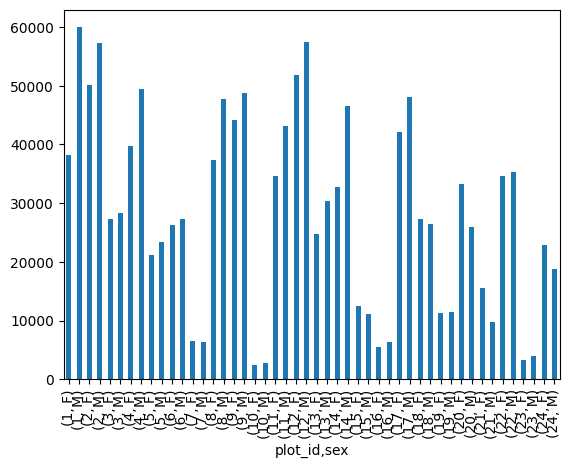

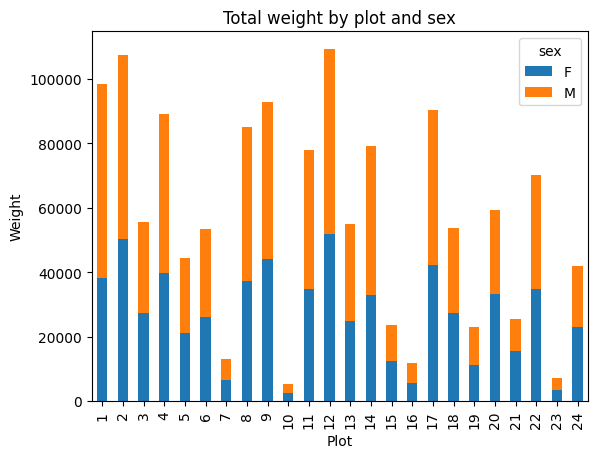

In [52]:
# Summary Plotting Challenge
## Create a stacked bar plot with weight on the y axis and the stacked variable being sex
## the plot should show total weight by sex for each site

stacked_plot = surveys_df.groupby(['plot_id', 'sex'])['weight'].sum()
print('stacked plot', stacked_plot)
unstacked_plot = stacked_plot.unstack() # determines the total weight that each sex contributed to each site
print('unstacked plot', unstacked_plot)
stacked_plot.plot(kind='bar') # shows sex side by side
s_plot = unstacked_plot.plot(kind='bar', stacked=True, title="Total weight by plot and sex") # shows sex stacked on top of each other
s_plot.set_ylabel('Weight')
s_plot.set_xlabel('Plot')

In [ ]:
# Key Points

## libraries enable us to extend the functionality of Python

## pandas is a popular library for working with data

## a dataframe is a pandas data structure that allows one to access data by column (name or index) or row

## aggregating data using the groupby() function enables you to generate useful summaries of data quickly

## plots can be created from dataframes or subsets of data that have been generated with groupby()